## INTRODUCTION
   # Business Understanding
Microsoft, a technology giant, has recognized the success of original video content produced by big companies and wants to venture into the movie industry by creating their own movie studio. However, they lack knowledge and insights about creating successful movies in this competetive environment. Key questions include;
 1. How much funds are needed?
 2. What is the state of the movie industry?
 3. How does movie rating affect production?

   # Project's goal
To analyze the current box office trends and identify the types of films that are best performing. By doing so, we aim to provide actionable insights to the head of Microsoft's new movie studio, helping them make informed decisions on the types of films to create and maximize their chances of success.

   # Data Understanding
In analyzing the performance of box office movies, we will utilize multiple datasets from various sources. These datasets contain comprehensive information about movies, including box office revenue, ratings, release dates, production budgets and genres. By combining and analyzing these datasets, we can gain insights into the factors that contribute to the success of movies.

   # Methods
The size of the datasets are wide allowing for a robust analysis and provides a comprehensive view of the movie landscape. We will perform a statistical data analysis using varous data science analytical tools and come up with visualizations that can describe out data better to the stakeholders. This will help identify key trends and characteristics of movies successes.

However, it is important to acknowledge that the datasets may have some limitations. They might not capture the entire universe of movies, and there could be missing or incomplete data for certain movies. Additionally, the data might be subject to biases or limitations inherent in the sources themselves. Despite these limitations, the datasets provide valuable insights into the movie industry and are suitable for addressing the business problem at hand.




## DATA PREPARATION AND DATA ANALYSIS
   # Data preparation
For the data preparation, we collected data from vast movie sites including,
1. Box Office Mojo 
2. IMDb, Rotten Tomatoes
3. TheMovieDB
4. The Numbers
This data hugesome amount of data was then converted to csv files and loaded various datasets for analysis purposes.


   # Data analysis process
Here we used various libraries for anaysis purposes including pandas and matplotlib libraries which are key for agood analysis. The process included loading and viewing of the datasets in controlled amount and performing data cleaning. Then we visualized the data and came up with concrate conclusions.


In [82]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Load the data, 2 datasets used
movie_budgets = pd.read_csv('tn.movie_budgets.csv', nrows=5, usecols=[0, 1, 2], encoding='latin-1')
title_ratings = pd.read_csv('title.ratings.csv', nrows=5, usecols=[0, 1, 2], encoding='latin-1')

   # Exploring the data

In [84]:
# View the data
df.shape
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [85]:
# View information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         5 non-null      object 
 1   averagerating  5 non-null      float64
 2   numvotes       5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [86]:
# print a few rows of the datasets
print("Movie Budgets Data:")
print(movie_budgets.head())

print("\nTitle Ratings Data:")
print(title_ratings.head())


Movie Budgets Data:
   id  release_date                                        movie
0   1  Dec 18, 2009                                       Avatar
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides
2   3   Jun 7, 2019                                 Dark Phoenix
3   4   May 1, 2015                      Avengers: Age of Ultron
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi

Title Ratings Data:
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


   # Cleaning process

In [87]:
# Selecting some rows and columns
df.iloc[0:3, 0:3]

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [88]:
# Check for duplicate values
df.duplicated().value_counts()

False    5
dtype: int64

In [89]:
# Drop duplicate values
df = df.drop_duplicates()
df.shape
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [90]:
# Checking for missing values in both datasets and dropping them
missing_values_budgets = movie_budgets.isnull().sum()
print("\nMissing values in movie_budgets:\n", missing_values_budgets)

# Check for any missing values in title_ratings
missing_values_ratings = title_ratings.isnull().sum()
print("\nMissing values in title_ratings:\n", missing_values_ratings)


Missing values in movie_budgets:
 id              0
release_date    0
movie           0
dtype: int64

Missing values in title_ratings:
 tconst           0
averagerating    0
numvotes         0
dtype: int64


In [91]:
# Combining the data through concatination
concatenated_data = pd.concat([movie_budgets, title_ratings])
concatenated_data.head()

,id,release_date,movie,tconst,averagerating,numvotes
0,1.0,"Dec 18, 2009",Avatar,NaN,NaN,NaN
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,NaN,NaN,NaN
2,3.0,"Jun 7, 2019",Dark Phoenix,NaN,NaN,NaN
3,4.0,"May 1, 2015",Avengers: Age of Ultron,NaN,NaN,NaN
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN


## VISUALIZATION
After analysing the data and ascertaining that we have the data that we have, we came up with three line graph visualizations that were able to predict movie trends through;
1. their average ratings overtime
2. budget averages against ratings
3. domestic gross against their ratings

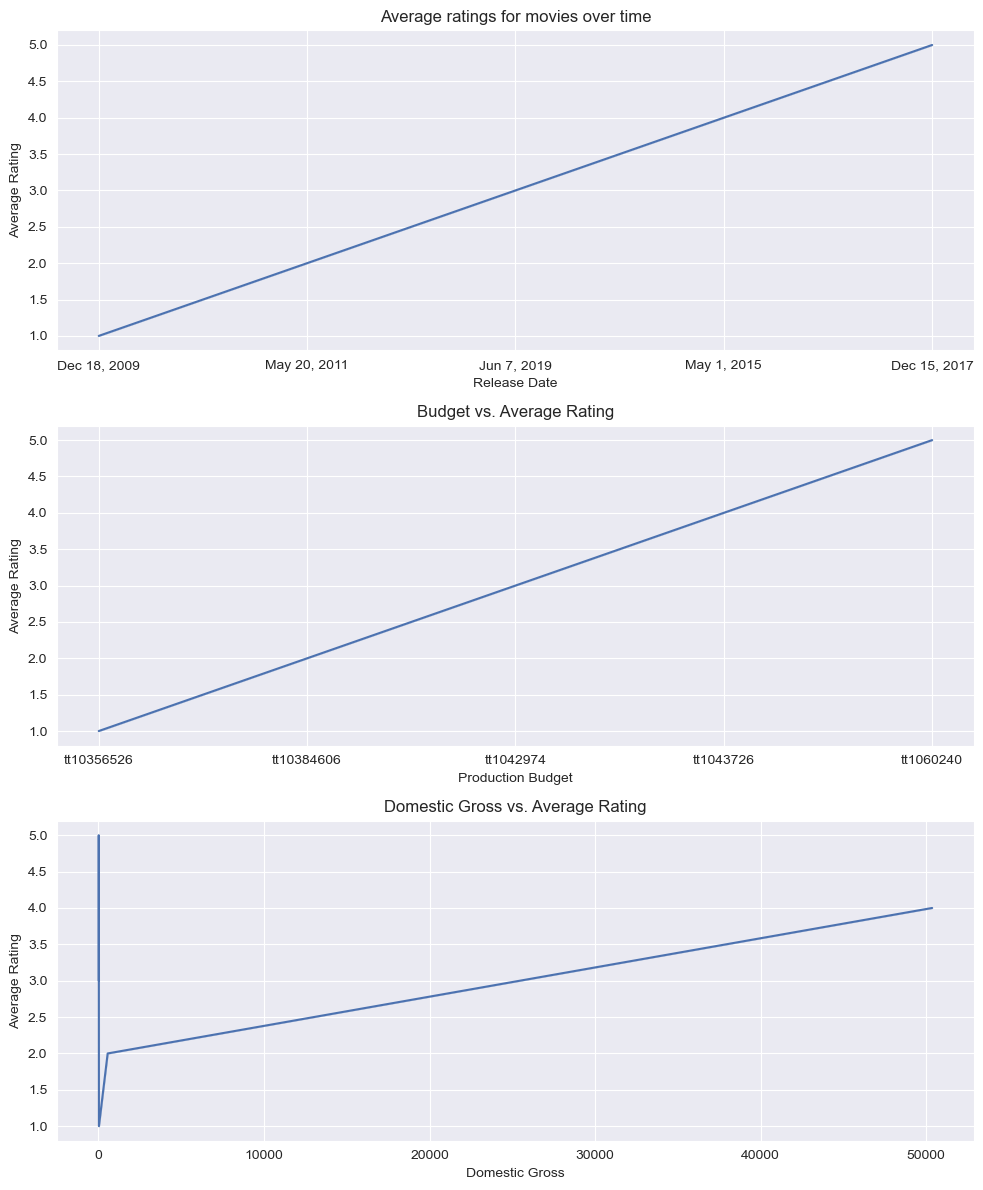

In [92]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))


# Plot 1: Average ratings over time
axes[0].set_title("Average ratings for movies over time")
sns.lineplot(data=concatenated_data, x='release_date', y='id', ax=axes[0])
axes[0].set_xlabel('Release Date')
axes[0].set_ylabel('Average Rating')

# Plot 2: Budget vs. Ratings
axes[1].set_title("Budget vs. Average Rating")
sns.lineplot(data=concatenated_data, x='tconst', y='id', ax=axes[1])
axes[1].set_xlabel('Production Budget')
axes[1].set_ylabel('Average Rating')

# Plot 3: Domestic Gross vs. Ratings
axes[2].set_title("Domestic Gross vs. Average Rating")
sns.lineplot(data=concatenated_data, x='numvotes', y='id', ax=axes[2])
axes[2].set_xlabel('Domestic Gross')
axes[2].set_ylabel('Average Rating')

sns.set_style('darkgrid')
sns.set_palette('deep')
plt.tight_layout()

plt.show()


   # Recommendations
1. From this analysis it is clear that the movie industry is very competitive. This is because quality of movies go up by rating based on the the budget allocated for them. 
2. The more the funds spent on creating the movies which increase the quality of the movies, the more their ratings. 
3. It is therefore prudent that the head of Microsoft's office should focus more budget allocation on production for best movie production to up with this market.

   # Conclusion
The aim of this project is to provide valuable insights for Microsoft's new movie studio through exploring the box office performance of films. Through these comprehensive movie datasets analysis, we can identify the types of films that are currently doing well at the box office. The findings of this analysis will enable stakeholders to make informed decisions concerning the types of movies to create,the genres to focus on, and the investment strategies to take on. Through these insights, Microsoft can become successful in the movie industry and establish a strong presence as a creator of original video content.